In [1]:
import os

os.chdir("/home/acamassa/ABCD/DDC/src/py_DDC")
from Compute_DDC import *

In [2]:
import glob

os.chdir("/nadata/cnl/abcd/data/imaging/fmri/rsfmri/interim/segmented/year2/")
# os.chdir('/cnl/abcd/data/imaging/fmri/rsfmri/interim/segmented/baseline_depr/')
files = glob.glob("**/filt_fMRI_segmented**.csv", recursive=True)

In [3]:
files

['sub-NDARINV0BAVEL0T/filt_fMRI_segmented_sub-NDARINV0BAVEL0Trun-02.csv',
 'sub-NDARINV0BAVEL0T/filt_fMRI_segmented_sub-NDARINV0BAVEL0Trun-03.csv',
 'sub-NDARINV0BAVEL0T/filt_fMRI_segmented_sub-NDARINV0BAVEL0Trun-01.csv',
 'sub-NDARINV0BAVEL0T/filt_fMRI_segmented_sub-NDARINV0BAVEL0Trun-04.csv',
 'sub-NDARINV0N10CEEL/filt_fMRI_segmented_sub-NDARINV0N10CEELrun-01.csv',
 'sub-NDARINV0N10CEEL/filt_fMRI_segmented_sub-NDARINV0N10CEELrun-02.csv',
 'sub-NDARINV0N10CEEL/filt_fMRI_segmented_sub-NDARINV0N10CEELrun-03.csv',
 'sub-NDARINV0N10CEEL/filt_fMRI_segmented_sub-NDARINV0N10CEELrun-04.csv',
 'sub-NDARINV00U4FTRU/filt_fMRI_segmented_sub-NDARINV00U4FTRUrun-01.csv',
 'sub-NDARINV00U4FTRU/filt_fMRI_segmented_sub-NDARINV00U4FTRUrun-02.csv',
 'sub-NDARINV00U4FTRU/filt_fMRI_segmented_sub-NDARINV00U4FTRUrun-03.csv',
 'sub-NDARINV00U4FTRU/filt_fMRI_segmented_sub-NDARINV00U4FTRUrun-04.csv',
 'sub-NDARINV0VXEC29A/filt_fMRI_segmented_sub-NDARINV0VXEC29Arun-01.csv',
 'sub-NDARINV0VXEC29A/filt_fMRI_segmen

In [3]:
len(files)

1704

In [5]:
import time
from nilearn.signal import clean
qc=[]
error = []
start = time.time()
ddc_dir = "/nadata/cnl/abcd/data/imaging/fmri/rsfmri/interim/DDC/year2/"
# ddc_dir = '/nadata/cnl/abcd/data/imaging/fmri/rsfmri/interim/DDC/baseline_depr/'
i=0
for f in files:
    print(i)
    i=i+1
    ts = np.loadtxt(f, delimiter=",", dtype=float)
    # try:
    #         ts=ts[17:,:]
#     if not os.path.exists(
#         ddc_dir + f.split("/")[0] + "/single_sessions/" + "subc_Reg_FDDC_" + f[-10:]
#     ):
    if not os.path.exists(ddc_dir + f.split("/")[0] + "/single_sessions/"):
        print("making dir")
        os.makedirs(ddc_dir + f.split("/")[0] + "/single_sessions/")

    print(f.split("/")[0])
    # compute covariance, DDC and regularized DDC
    Cov, DDC, Reg_DDC, nl_DDC, qc_flag = compute_ddc(ts, 0.8, "c")
    qc.append([f, qc_flag])
    pd.DataFrame(Cov).to_csv(
        ddc_dir + f.split("/")[0] + "/single_sessions/" + "subc_Cov_" + f[-10:],
        header=None,
        index=None,
    )
    pd.DataFrame(DDC).to_csv(
        ddc_dir + f.split("/")[0] + "/single_sessions/" + "subc_DDC_" + f[-10:],
        header=None,
        index=None,
    )
    pd.DataFrame(Reg_DDC).to_csv(
        ddc_dir + f.split("/")[0] + "/single_sessions/" + "subc_Reg_DDC_" + f[-10:],
        header=None,
        index=None,
    )

    # compute fractional DDC and reg fract DDC
    FDDC, Reg_FDDC = compute_fddc(ts, 0.8, 0.5)
    pd.DataFrame(FDDC).to_csv(
        ddc_dir + f.split("/")[0] + "/single_sessions/" + "subc_FDDC_" + f[-10:],
        header=None,
        index=None,
    )
    pd.DataFrame(Reg_FDDC).to_csv(
        ddc_dir
        + f.split("/")[0]
        + "/single_sessions/"
        + "subc_Reg_FDDC_"
        + f[-10:],
        header=None,
        index=None,
    )

        # except:
    #   print('error')
    #  error.append(f)
end = time.time()
print(end - start)

0
sub-NDARINV2BPVXTH3
Cov is rank deficient!
1
sub-NDARINV2BPVXTH3
2
sub-NDARINV2BPVXTH3
3
sub-NDARINV2BPVXTH3
Cov is rank deficient!
4
sub-NDARINVGP88W2WM
Cov is rank deficient!
5
sub-NDARINVGP88W2WM
6
sub-NDARINVGP88W2WM
7
sub-NDARINVGP88W2WM
8
sub-NDARINV8M3N131W
9
sub-NDARINV8M3N131W
10
sub-NDARINV8M3N131W
11
sub-NDARINV8M3N131W
12
sub-NDARINV7AWGW55P
Cov is rank deficient!
13
sub-NDARINV7AWGW55P
Cov is rank deficient!
14
sub-NDARINV7AWGW55P
Cov is rank deficient!
15
sub-NDARINV7AWGW55P
16
sub-NDARINV5RY4ZHHG
Cov is rank deficient!
17
sub-NDARINV5RY4ZHHG
18
sub-NDARINV5RY4ZHHG
Cov is rank deficient!
19
sub-NDARINV5RY4ZHHG
20
sub-NDARINV5PU4UNRW
Cov is rank deficient!
21
sub-NDARINV5PU4UNRW
22
sub-NDARINV5PU4UNRW
23
sub-NDARINV5PU4UNRW
24
sub-NDARINV67LUTZ66
25
sub-NDARINV67LUTZ66
26
sub-NDARINV67LUTZ66
Cov is rank deficient!
27
sub-NDARINV9EVRB30H
Cov is rank deficient!
28
sub-NDARINV9EVRB30H
29
sub-NDARINV9EVRB30H
30
sub-NDARINV9J2GH4BM
31
sub-NDARINV9J2GH4BM
32
sub-NDARINV9J2GH4B

265
sub-NDARINV5NU3KPN3
266
sub-NDARINV8WBV631M
Cov is rank deficient!
267
sub-NDARINV8WBV631M
268
sub-NDARINV8WBV631M
Cov is rank deficient!
269
sub-NDARINV7UY7DLBX
270
sub-NDARINV7UY7DLBX
271
sub-NDARINV7UY7DLBX
272
sub-NDARINV7UY7DLBX
Cov is rank deficient!
273
sub-NDARINVPAFJ1FYV
274
sub-NDARINVPAFJ1FYV
275
sub-NDARINVPAFJ1FYV
276
sub-NDARINVPAFJ1FYV
277
sub-NDARINV0DBRJXKG
Cov is rank deficient!
278
sub-NDARINV0DBRJXKG
Cov is rank deficient!
279
sub-NDARINV0DBRJXKG
Cov is rank deficient!
280
sub-NDARINV7KP7C6RB
281
sub-NDARINV7KP7C6RB
282
sub-NDARINV7KP7C6RB
Cov is rank deficient!
283
sub-NDARINV7KP7C6RB
Cov is rank deficient!
284
sub-NDARINV1R4G3839
285
sub-NDARINV1R4G3839
Cov is rank deficient!
286
sub-NDARINV1R4G3839
287
sub-NDARINV27H5R87Z
288
sub-NDARINV27H5R87Z
Cov is rank deficient!
289
sub-NDARINV27H5R87Z
290
sub-NDARINV27H5R87Z
291
sub-NDARINV4EHL4L0L
292
sub-NDARINV4EHL4L0L
293
sub-NDARINV4EHL4L0L
Cov is rank deficient!
294
sub-NDARINV4EHL4L0L
295
sub-NDARINVBX3VYZF1
296

529
sub-NDARINV2NMMXZ45
Cov is rank deficient!
530
sub-NDARINV2NMMXZ45
Cov is rank deficient!
531
sub-NDARINV2NMMXZ45
Cov is rank deficient!
532
sub-NDARINV32ZL36Y0
Cov is rank deficient!
533
sub-NDARINV32ZL36Y0
Cov is rank deficient!
534
sub-NDARINV32ZL36Y0
Cov is rank deficient!
535
sub-NDARINV32ZL36Y0
Cov is rank deficient!
536
sub-NDARINV6DYLLUU6
Cov is rank deficient!
537
sub-NDARINV6DYLLUU6
538
sub-NDARINV6DYLLUU6
Cov is rank deficient!
539
sub-NDARINV6DYLLUU6
540
sub-NDARINV66LWGDCB
541
sub-NDARINV66LWGDCB
Cov is rank deficient!
542
sub-NDARINV66LWGDCB
Cov is rank deficient!
543
sub-NDARINV66LWGDCB
Cov is rank deficient!
544
sub-NDARINV5D3CU8ML
Cov is rank deficient!
545
sub-NDARINV5D3CU8ML
Cov is rank deficient!
546
sub-NDARINV5D3CU8ML
Cov is rank deficient!
547
sub-NDARINV5D3CU8ML
Cov is rank deficient!
548
sub-NDARINV1PE0ZVR4
549
sub-NDARINV1PE0ZVR4
550
sub-NDARINV1PE0ZVR4
Cov is rank deficient!
551
sub-NDARINV1PE0ZVR4
552
sub-NDARINV3MTP07E9
553
sub-NDARINV3MTP07E9
554
sub-N

783
sub-NDARINV1R4UUF8E
784
sub-NDARINV1R4UUF8E
785
sub-NDARINV1R4UUF8E
786
sub-NDARINV1R4UUF8E
Cov is rank deficient!
787
sub-NDARINV2YBXVCKR
Cov is rank deficient!
788
sub-NDARINV2YBXVCKR
Cov is rank deficient!
789
sub-NDARINV2YBXVCKR
790
sub-NDARINV2YBXVCKR
791
sub-NDARINV3G46KLE7
792
sub-NDARINV3G46KLE7
793
sub-NDARINV3G46KLE7
794
sub-NDARINV3G46KLE7
795
sub-NDARINV3MTFEAAU
Cov is rank deficient!
796
sub-NDARINV3MTFEAAU
Cov is rank deficient!
797
sub-NDARINV3MTFEAAU
798
sub-NDARINV3MTFEAAU
799
sub-NDARINV9CA16AC9
800
sub-NDARINV9CA16AC9
801
sub-NDARINV9CA16AC9
Cov is rank deficient!
802
sub-NDARINV82FT97YR
803
sub-NDARINV82FT97YR
804
sub-NDARINV82FT97YR
805
sub-NDARINV82FT97YR
806
sub-NDARINV8J2PXGLH
Cov is rank deficient!
807
sub-NDARINV8J2PXGLH
Cov is rank deficient!
808
sub-NDARINV8J2PXGLH
Cov is rank deficient!
809
sub-NDARINV8J2PXGLH
810
sub-NDARINV0YLE20YZ
811
sub-NDARINV0YLE20YZ
812
sub-NDARINV0YLE20YZ
Cov is rank deficient!
813
sub-NDARINV0YLE20YZ
814
sub-NDARINV04CLBZAD
Co

1056
sub-NDARINV19GEFHUC
1057
sub-NDARINV19GEFHUC
Cov is rank deficient!
1058
sub-NDARINV5TEDV177
Cov is rank deficient!
1059
sub-NDARINV5TEDV177
1060
sub-NDARINV5TEDV177
1061
sub-NDARINV5TEDV177
1062
sub-NDARINV2VGE4HK8
Cov is rank deficient!
1063
sub-NDARINV2VGE4HK8
Cov is rank deficient!
1064
sub-NDARINV2VGE4HK8
1065
sub-NDARINV2VGE4HK8
1066
sub-NDARINV5G46RBZN
Cov is rank deficient!
1067
sub-NDARINV5G46RBZN
Cov is rank deficient!
1068
sub-NDARINV5G46RBZN
Cov is rank deficient!
1069
sub-NDARINV5G46RBZN
Cov is rank deficient!
1070
sub-NDARINV7G8CPXCM
1071
sub-NDARINV7G8CPXCM
Cov is rank deficient!
1072
sub-NDARINV7G8CPXCM
1073
sub-NDARINV75RAY395
1074
sub-NDARINV75RAY395
1075
sub-NDARINV75RAY395
Cov is rank deficient!
1076
sub-NDARINV75RAY395
Cov is rank deficient!
1077
sub-NDARINV42425KF9
1078
sub-NDARINV42425KF9
1079
sub-NDARINV42425KF9
1080
sub-NDARINV42425KF9
1081
sub-NDARINV52PY7ZPT
1082
sub-NDARINV52PY7ZPT
1083
sub-NDARINV52PY7ZPT
1084
sub-NDARINV52PY7ZPT
1085
sub-NDARINV3ACT8T

1295
sub-NDARINV7WBW8TFG
Cov is rank deficient!
1296
sub-NDARINV7WBW8TFG
1297
sub-NDARINVFL7U8P81
1298
sub-NDARINVFL7U8P81
1299
sub-NDARINVFL7U8P81
1300
sub-NDARINVFL7U8P81
1301
sub-NDARINVEKN9FWNN
Cov is rank deficient!
1302
sub-NDARINVEKN9FWNN
Cov is rank deficient!
1303
sub-NDARINVEKN9FWNN
Cov is rank deficient!
1304
sub-NDARINVEKN9FWNN
Cov is rank deficient!
1305
sub-NDARINV4UMAF27X
Cov is rank deficient!
1306
sub-NDARINV4UMAF27X
Cov is rank deficient!
1307
sub-NDARINV4UMAF27X
Cov is rank deficient!
1308
sub-NDARINV4UMAF27X
Cov is rank deficient!
1309
sub-NDARINV26V2CZ6Z
1310
sub-NDARINV26V2CZ6Z
1311
sub-NDARINV26V2CZ6Z
1312
sub-NDARINV26V2CZ6Z
1313
sub-NDARINVDRM97DTU
Cov is rank deficient!
1314
sub-NDARINVDRM97DTU
Cov is rank deficient!
1315
sub-NDARINVDRM97DTU
Cov is rank deficient!
1316
sub-NDARINVDRM97DTU
Cov is rank deficient!
1317
sub-NDARINV5WLH822H
1318
sub-NDARINV5WLH822H
1319
sub-NDARINV5WLH822H
1320
sub-NDARINV5WLH822H
1321
sub-NDARINV9A6HTXF6
Cov is rank deficient!
132

1527
sub-NDARINV34XE873R
Cov is rank deficient!
1528
sub-NDARINV34XE873R
Cov is rank deficient!
1529
making dir
sub-NDARINVC1VM5JUL
Cov is rank deficient!
1530
sub-NDARINVC1VM5JUL
Cov is rank deficient!
1531
sub-NDARINVC1VM5JUL
Cov is rank deficient!
1532
making dir
sub-NDARINVD1PRDRJG
Cov is rank deficient!
1533
sub-NDARINVD1PRDRJG
Cov is rank deficient!
1534
sub-NDARINVD1PRDRJG
1535
making dir
sub-NDARINV7KENV8ZC
1536
sub-NDARINV7KENV8ZC
1537
sub-NDARINV7KENV8ZC
1538
sub-NDARINV7KENV8ZC
1539
making dir
sub-NDARINVJXMWYPZB
1540
sub-NDARINVJXMWYPZB
1541
sub-NDARINVJXMWYPZB
1542
making dir
sub-NDARINV66TNJAWV
1543
sub-NDARINV66TNJAWV
1544
sub-NDARINV66TNJAWV
1545
sub-NDARINV66TNJAWV
1546
making dir
sub-NDARINVAM2YFACM
1547
sub-NDARINVAM2YFACM
1548
sub-NDARINVAM2YFACM
1549
sub-NDARINVAM2YFACM
1550
making dir
sub-NDARINVH1DJ48J1
Cov is rank deficient!
1551
sub-NDARINVH1DJ48J1
Cov is rank deficient!
1552
sub-NDARINVH1DJ48J1
Cov is rank deficient!
1553
sub-NDARINVH1DJ48J1
Cov is rank defici

In [ ]:
len(error)

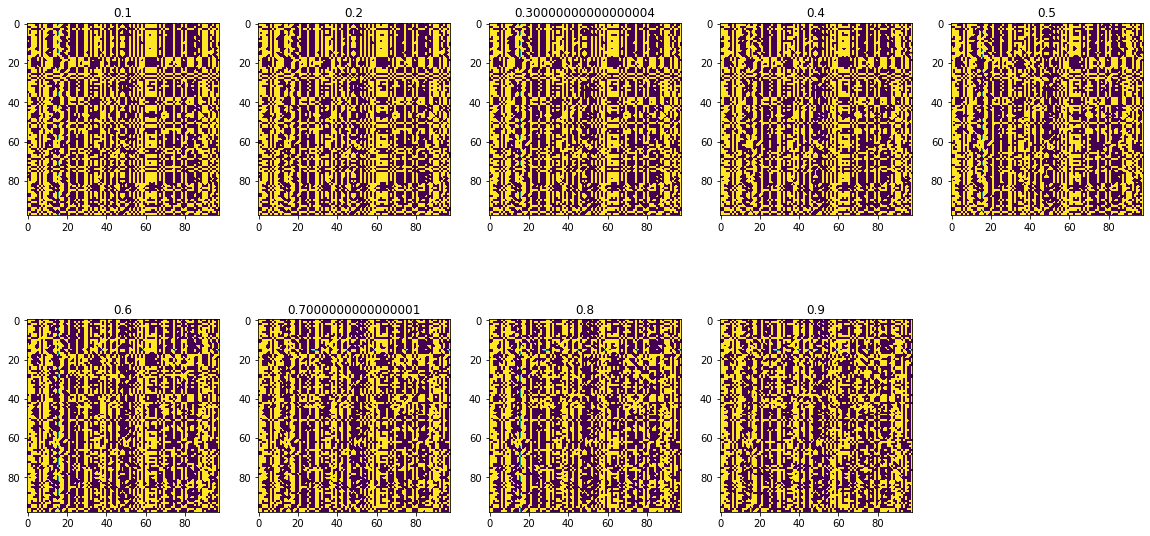

In [9]:
import matplotlib.pyplot as plt
from fracdiff import fdiff

ts = ts[17:, :]
V_obs = zscore(ts, ddof=1)
T, N = np.shape(ts)
frac = np.arange(0.1, 1, 0.1)
Cov, Precision, B, _ = estimators(V_obs, 0, 0.8)

plt.figure(figsize=(20, 10))
i = 0
for f in frac:
    i = i + 1
    fd = fdiff(V_obs, f, axis=0)
    rowmean = np.mean(fd, axis=0)
    diff_cx = np.vstack([fd, rowmean])
    diff_cx = fd
    Csample = np.cov(np.hstack((diff_cx, ts)).T)
    dFrac = Csample[0:N, N : N + N]
    fd_DDC = dFrac @ Precision
    plt.subplot(2, 5, i)
    plt.imshow(fd_DDC)
    plt.title(str(f))
    #     plt.colorbar()
    plt.clim([-0.5, 0.5])

In [12]:
C = dFrac
B = Cov
Reg_DDC = np.zeros(np.shape(C))

l = 1e-2
Bb = sklearn.preprocessing.scale(B)
for n in range(len(C)):
    ci = C[n, :]
    ridgereg = Ridge(alpha=l)
    ridgereg.fit(Bb, ci.T)
    coef = ridgereg.coef_
    Reg_DDC[n, :] = coef.T

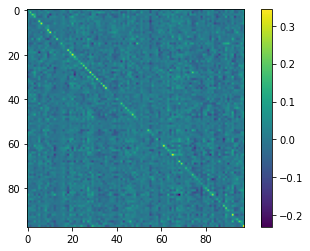

In [14]:
plt.figure()
plt.imshow(Reg_DDC)
plt.colorbar()

In [29]:
fddc.to_csv("FDDC_run-03.csv", header=None, index=None)

In [30]:
pd.read_csv("FDDC_run-03.csv", header=None)

0         1         2         3         4         5         6   \
0   0.756095  0.016391 -0.119278  0.011027  0.090673 -0.147896  0.171072   
1   0.085581  0.845929  0.026369 -0.086521 -0.020928 -0.249994 -0.051269   
2   0.064758 -0.006124  0.701203 -0.175064  0.043141 -0.024729  0.096850   
3   0.013291  0.053027 -0.007207  0.631835 -0.038837 -0.150298  0.101002   
4   0.162080  0.066926  0.121565 -0.176059  0.826212 -0.099661  0.276580   
..       ...       ...       ...       ...       ...       ...       ...   
63  0.055768  0.031125  0.000349 -0.249322  0.021272 -0.251512  0.006092   
64 -0.137262  0.061678 -0.072071 -0.110740 -0.006178 -0.160192  0.010681   
65  0.125383  0.105942  0.013360  0.023843 -0.083509 -0.149668  0.183896   
66  0.243035 -0.026867 -0.100690 -0.190293 -0.007702 -0.198064  0.213258   
67  0.074769  0.021537 -0.081111 -0.164048 -0.006903 -0.166485  0.010207   

          7         8         9   ...        58        59        60        61  \
0  -0.082389  0.056440  0.010546  ... -0.053177 -0.133197  0.272637 -0.201989   
1  -0.041116 -0.005777  0.028696  ...  0.032871  0.056790  0.212330  0.387754   
2  -0.065096  0.048206  0.034651  ... -0.027584 -0.149661  0.177956 -0.124678   
3  -0.043158 -0.054982  0.103228  ...  0.012558 -0.005957 -0.148132 -0.174426   
4  -0.073415 -0.006258 -0.082220  ... -0.016070  0.403032 -0.049735 -0.489789   
..       ...       ...       ...  ...       ...       ...       ...       ...   
63 -0.089108  0.041754 -0.003881  ... -0.050090 -0.090751  0.229531 -0.176787   
64 -0.029444  0.057652 -0.114938  ...  0.062782 -0.194543 -0.280437  0.201498   
65 -0.071882  0.139960 -0.192668  ...  0.016315 -0.030674  0.092145 -0.325748   
66 -0.075946  0.065540 -0.008198  ... -0.106165  0.262038  0.024371  0.187594   
67 -0.055971 -0.034276  0.010959  ... -0.042906 -0.139494  0.310250  0.256820   

          62        63        64        65        66        67  
0  -0.104130 -0.044517 -0.044632 -0.065734  0.034639  0.051503  
1  -0.004400 -0.002473 -0.153777  0.113009  0.042426  0.025461  
2  -0.019573 -0.058460 -0.102345 -0.025677  0.021412  0.126253  
3  -0.041215 -0.028758 -0.112792  0.045888  0.015905  0.042867  
4  -0.113260  0.124521 -0.282926 -0.020746 -0.026111 -0.004155  
..       ...       ...       ...       ...       ...       ...  
63  0.078689  0.518702 -0.107061 -0.043320  0.049465 -0.031914  
64 -0.189088  0.015638  0.795796 -0.034670  0.032028  0.044881  
65 -0.218182 -0.059626  0.200013  0.597520  0.032648 -0.070482  
66 -0.389796 -0.050467  0.186439 -0.086520  1.069089  0.084179  
67  0.115103 -0.129922 -0.014336 -0.016364  0.048661  0.837559  

[68 rows x 68 columns]

In [20]:
os.chdir(
    "/nadata/cnl/abcd/data/imaging/fmri/rsfmri/interim/DDC/baseline/raw/sub-NDARINVZBLU9Z3A/single_sessions/"
)
pd.read_csv("Reg_DDC2H_run-01.csv", header=None)

0         1         2         3         4         5         6   \
0  -0.003574  0.005922  0.006100 -0.009301  0.011604 -0.041034  0.025276   
1  -0.004128  0.010322 -0.022977  0.008327  0.002160 -0.006793  0.002623   
2  -0.006647  0.000956  0.002396 -0.007097  0.014211 -0.030627  0.011860   
3  -0.002350 -0.003879  0.003857  0.009580 -0.002752 -0.012543  0.046924   
4   0.015543  0.008968 -0.015695  0.015278  0.001801 -0.022393  0.008346   
..       ...       ...       ...       ...       ...       ...       ...   
63 -0.000644  0.010573 -0.007412  0.003040  0.004658 -0.021552  0.030990   
64 -0.007095 -0.002546 -0.029558  0.026509 -0.006056 -0.030550  0.042576   
65  0.008966  0.006841  0.016894 -0.004828 -0.004210  0.016413  0.013010   
66  0.004195  0.001921  0.054633 -0.002657  0.013601  0.005385  0.017396   
67 -0.004407  0.006902 -0.026285  0.008428 -0.001393 -0.031248  0.035006   

          7         8         9   ...        58        59        60        61  \
0   0.001218 -0.026826 -0.013621  ...  0.012150 -0.007924  0.056567 -0.034080   
1  -0.015074 -0.007426  0.018744  ...  0.000173  0.009347  0.042531 -0.023677   
2  -0.015687 -0.019928  0.005078  ...  0.007189 -0.005228  0.048282 -0.047073   
3  -0.036242 -0.021728 -0.030362  ... -0.015178  0.010558 -0.002804 -0.000737   
4   0.001976 -0.002468 -0.000647  ...  0.000113  0.016295 -0.007960  0.007643   
..       ...       ...       ...  ...       ...       ...       ...       ...   
63 -0.034252 -0.007401 -0.029380  ...  0.009483 -0.005395  0.041333 -0.010750   
64 -0.028929 -0.011112 -0.030504  ...  0.015879 -0.025424  0.012153 -0.021344   
65 -0.011780 -0.023077 -0.023510  ...  0.001098  0.001948  0.013716 -0.009172   
66  0.004957 -0.014491 -0.008885  ...  0.023014  0.004481  0.066396 -0.053948   
67 -0.027638 -0.018304 -0.023145  ...  0.005210 -0.009454  0.020008  0.011612   

          62        63        64        65        66        67  
0  -0.020255  0.013519 -0.000407 -0.016262 -0.000106  0.002582  
1  -0.023816 -0.019561  0.008975 -0.029701  0.007484 -0.017627  
2  -0.032609 -0.020544  0.003869 -0.018386  0.001063  0.009129  
3  -0.012797  0.014345 -0.012935  0.013078 -0.006102 -0.017216  
4  -0.013601 -0.007529  0.029300 -0.012701  0.002821  0.015452  
..       ...       ...       ...       ...       ...       ...  
63  0.010095 -0.023870  0.006619 -0.001962  0.005188 -0.000804  
64 -0.030139  0.025180 -0.004827  0.002554  0.016730 -0.002608  
65  0.010426  0.020780  0.020490 -0.005947 -0.000102 -0.000543  
66 -0.029301 -0.043906 -0.027691 -0.021225  0.010212  0.007972  
67  0.001954  0.004531  0.006078 -0.014134 -0.001215  0.005973  

[68 rows x 68 columns]

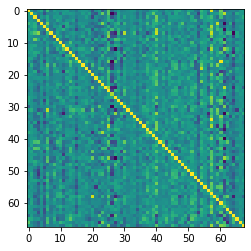

In [8]:
plt.figure()
plt.imshow(fddc)
plt.clim([-0.5, 0.5])

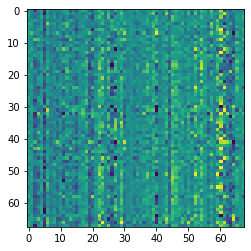

In [10]:
plt.figure()
plt.imshow(DDC)
plt.clim([-0.5, 0.5])

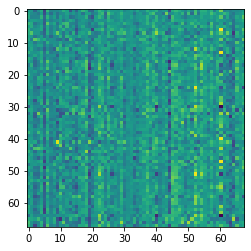

In [12]:
plt.figure()
plt.imshow(Reg_DDC)

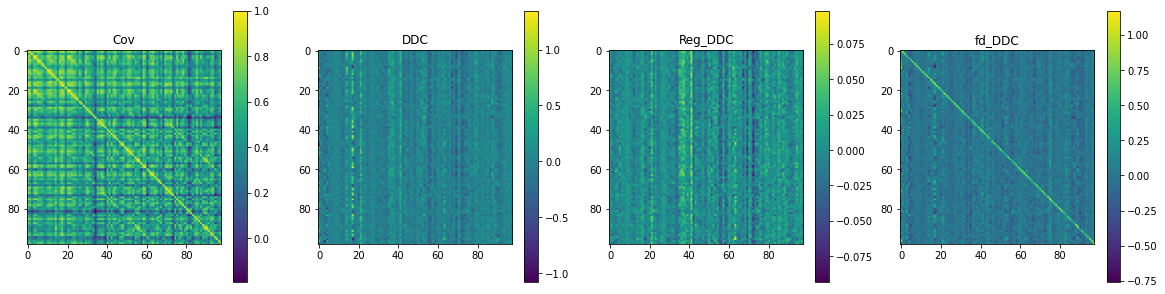

In [7]:
Cov, DDC, Reg_DDC, _ = compute_ddc(ts, 0.8, 2)
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.subplot(141)
plt.imshow(Cov)
plt.title("Cov")
plt.colorbar()
plt.subplot(142)
plt.imshow(DDC)
plt.title("DDC")
plt.colorbar()
plt.subplot(143)
plt.imshow(Reg_DDC)
plt.title("Reg_DDC")
plt.colorbar()
plt.subplot(144)
plt.imshow(FDDC)
plt.title("fd_DDC")
plt.colorbar()
# plt.clim([-0.5,0.5])

In [32]:
tsfile = "/nadata/cnl/abcd/data/imaging/fmri/rsfmri/interim/segmented/baseline/test1/sub-NDARINVZBLU9Z3A/filt_cortex_fMRI_segmented_sub-NDARINVZBLU9Z3Arun-04.csv"
ts = np.loadtxt(tsfile, delimiter=",", dtype=float)

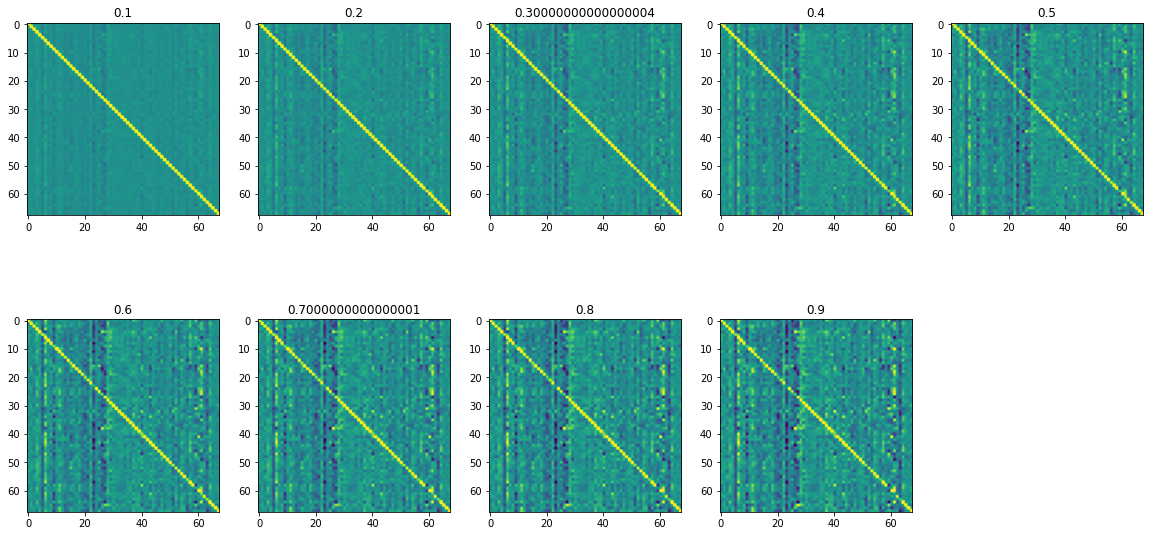

In [33]:
import matplotlib.pyplot as plt
from fracdiff import fdiff

ts = ts[1:, :]
V_obs = zscore(ts, ddof=1)
T, N = np.shape(ts)
frac = np.arange(0.1, 1, 0.1)
Cov, Precision, B, _ = estimators(V_obs, 0, 0.8)

plt.figure(figsize=(20, 10))
i = 0
for f in frac:
    i = i + 1
    fd = fdiff(V_obs, f, axis=0)
    rowmean = np.mean(fd, axis=0)
    diff_cx = np.vstack([fd, rowmean])
    diff_cx = fd
    Csample = np.cov(np.hstack((diff_cx, ts)).T)
    dFrac = Csample[0:N, N : N + N]
    fd_DDC = dFrac @ Precision
    plt.subplot(2, 5, i)
    plt.imshow(fd_DDC)
    plt.title(str(f))
    #     plt.colorbar()
    plt.clim([-0.5, 0.5])

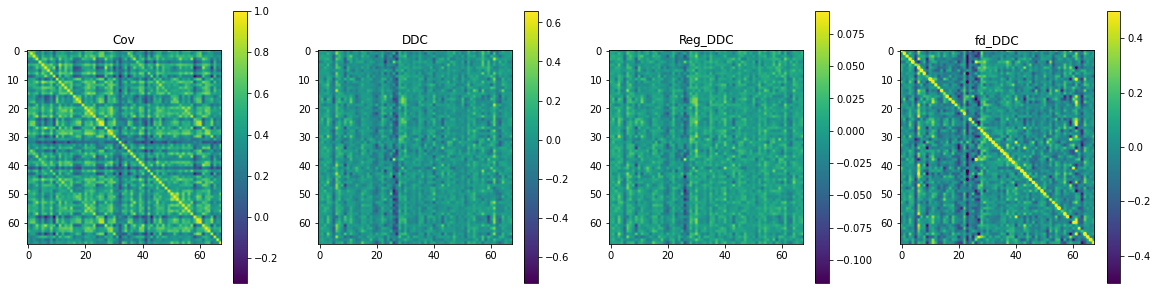

In [34]:
Cov, DDC, Reg_DDC, _ = compute_ddc(ts, 0.8, 2)
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.subplot(141)
plt.imshow(Cov)
plt.title("Cov")
plt.colorbar()
plt.subplot(142)
plt.imshow(DDC)
plt.title("DDC")
plt.colorbar()
plt.subplot(143)
plt.imshow(Reg_DDC)
plt.title("Reg_DDC")
plt.colorbar()
plt.subplot(144)
plt.imshow(fd_DDC)
plt.title("fd_DDC")
plt.colorbar()
plt.clim([-0.5, 0.5])

In [35]:
tsfile = "/nadata/cnl/abcd/data/imaging/fmri/rsfmri/interim/segmented/baseline/test1/sub-NDARINVZBLU9Z3A/filt_cortex_fMRI_segmented_sub-NDARINVZBLU9Z3Arun-02.csv"
ts = np.loadtxt(tsfile, delimiter=",", dtype=float)

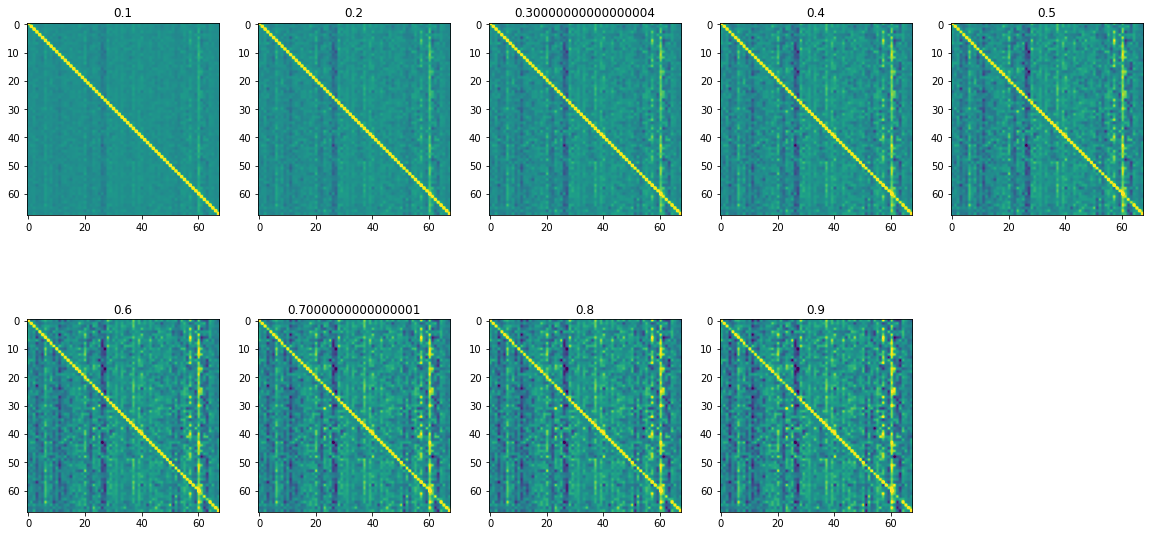

In [36]:
import matplotlib.pyplot as plt
from fracdiff import fdiff

ts = ts[1:, :]
V_obs = zscore(ts, ddof=1)
T, N = np.shape(ts)
frac = np.arange(0.1, 1, 0.1)
Cov, Precision, B, _ = estimators(V_obs, 0, 0.8)

plt.figure(figsize=(20, 10))
i = 0
for f in frac:
    i = i + 1
    fd = fdiff(V_obs, f, axis=0)
    rowmean = np.mean(fd, axis=0)
    diff_cx = np.vstack([fd, rowmean])
    diff_cx = fd
    Csample = np.cov(np.hstack((diff_cx, ts)).T)
    dFrac = Csample[0:N, N : N + N]
    fd_DDC = dFrac @ Precision
    plt.subplot(2, 5, i)
    plt.imshow(fd_DDC)
    plt.title(str(f))
    #     plt.colorbar()
    plt.clim([-0.5, 0.5])

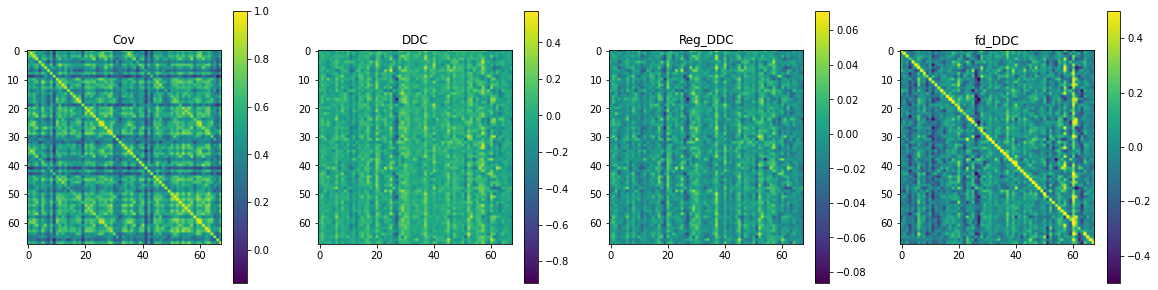

In [37]:
Cov, DDC, Reg_DDC, _ = compute_ddc(ts, 0.8, 2)
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.subplot(141)
plt.imshow(Cov)
plt.title("Cov")
plt.colorbar()
plt.subplot(142)
plt.imshow(DDC)
plt.title("DDC")
plt.colorbar()
plt.subplot(143)
plt.imshow(Reg_DDC)
plt.title("Reg_DDC")
plt.colorbar()
plt.subplot(144)
plt.imshow(fd_DDC)
plt.title("fd_DDC")
plt.colorbar()
plt.clim([-0.5, 0.5])

In [38]:
tsfile = "/nadata/cnl/abcd/data/imaging/fmri/rsfmri/interim/segmented/baseline/test1/sub-NDARINVZBLU9Z3A/filt_cortex_fMRI_segmented_sub-NDARINVZBLU9Z3Arun-01.csv"
ts = np.loadtxt(tsfile, delimiter=",", dtype=float)

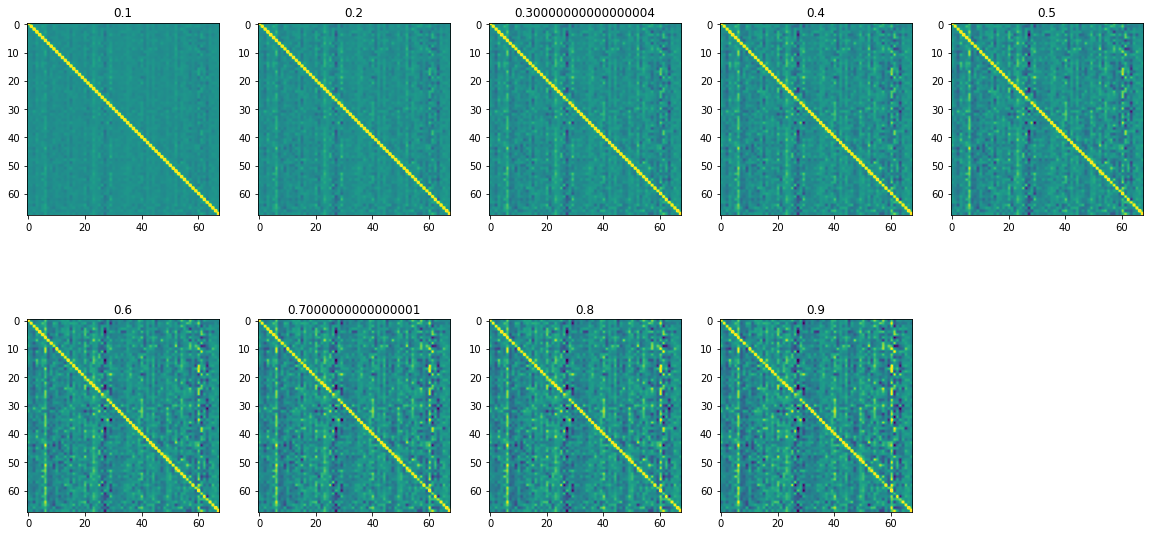

In [39]:
import matplotlib.pyplot as plt
from fracdiff import fdiff

ts = ts[1:, :]
V_obs = zscore(ts, ddof=1)
T, N = np.shape(ts)
frac = np.arange(0.1, 1, 0.1)
Cov, Precision, B, _ = estimators(V_obs, 0, 0.8)

plt.figure(figsize=(20, 10))
i = 0
for f in frac:
    i = i + 1
    fd = fdiff(V_obs, f, axis=0)
    rowmean = np.mean(fd, axis=0)
    diff_cx = np.vstack([fd, rowmean])
    diff_cx = fd
    Csample = np.cov(np.hstack((diff_cx, ts)).T)
    dFrac = Csample[0:N, N : N + N]
    fd_DDC = dFrac @ Precision
    plt.subplot(2, 5, i)
    plt.imshow(fd_DDC)
    plt.title(str(f))
    #     plt.colorbar()
    plt.clim([-0.5, 0.5])

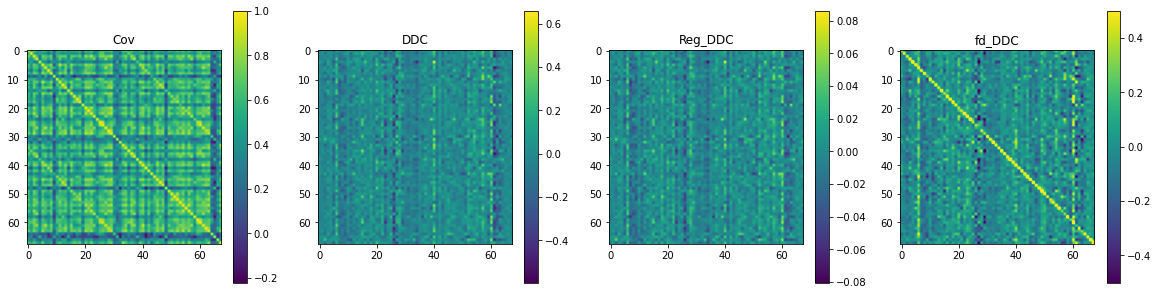

In [40]:
Cov, DDC, Reg_DDC, _ = compute_ddc(ts, 0.8, 2)
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.subplot(141)
plt.imshow(Cov)
plt.title("Cov")
plt.colorbar()
plt.subplot(142)
plt.imshow(DDC)
plt.title("DDC")
plt.colorbar()
plt.subplot(143)
plt.imshow(Reg_DDC)
plt.title("Reg_DDC")
plt.colorbar()
plt.subplot(144)
plt.imshow(fd_DDC)
plt.title("fd_DDC")
plt.colorbar()
plt.clim([-0.5, 0.5])

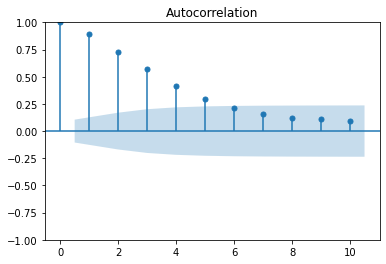

<Figure size 432x288 with 0 Axes>

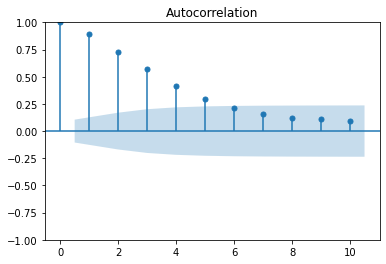

In [47]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure()
plot_acf(ts[:, 20], lags=10, label="ACF")

In [13]:
Cov, DDC, Reg_DDC, _ = compute_ddc(ts, 0.8, 2)

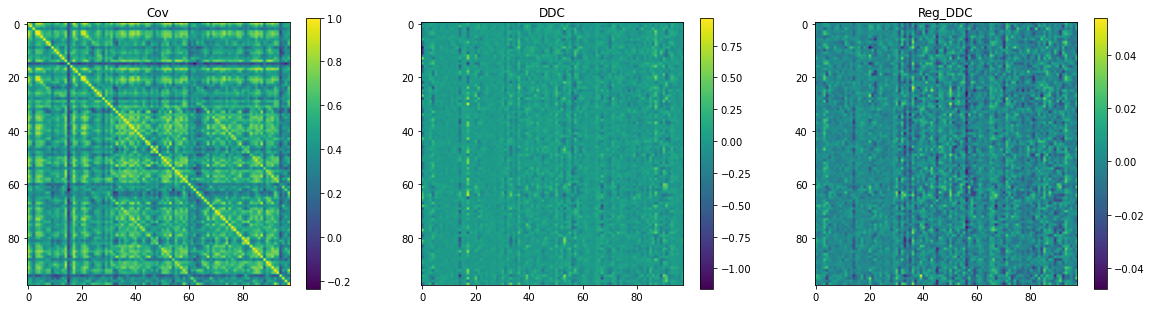

In [29]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.imshow(Cov)
plt.title("Cov")
plt.colorbar()
plt.subplot(132)
plt.imshow(DDC)
plt.title("DDC")
plt.colorbar()
plt.subplot(133)
plt.imshow(Reg_DDC)
plt.title("Reg_DDC")
plt.colorbar()

# Clean DDC

In [5]:
import os, sys, tarfile
import glob

os.chdir("/nadata/cnl/abcd/data/imaging/fmri/rsfmri/interim/DDC/baseline/raw/")
files = glob.glob("**/filt_Cov1H*.csv", recursive=True)

In [6]:
len(files)

22956

In [7]:
for i in range(len(files)):
    os.remove(files[i])